### get the reference dataframe for the assembled TCRs and filter on the unique TCRs that we can detect in the screen

In [ ]:
import pandas as pd

toolbox_path = ""

ref_df_path = path= toolbox_path + "tcr_toolbox_tcr_assembly_runs/r3_2023-08-23_any_mers_full_seq_dataset_vdjdb_only/v6/sequencing_quality_analysis/references/tcr_refs_df.csv"
ref_df = pd.read_csv(ref_df_path)
fasta_path = toolbox_path + "tcr_toolbox_tcr_assembly_runs/r3_2023-08-23_any_mers_full_seq_dataset_vdjdb_only/v6/sequencing_quality_analysis/references/stapler_tcr_assembly_nanopore.fa"
fasta_data = {}
with open(fasta_path, "r") as fasta_in:
    for entry in fasta_in:
        if entry.startswith(">"):
            entry = entry[1:].strip('\n')
            name_entry = entry
            fasta_data[name_entry] = ""
        else:
            fasta_data[name_entry] += entry.strip()

print(len(fasta_data), 'fasta_data')
subset_data = list(fasta_data.keys())

print(len(ref_df) , 'ref_df before')
ref_df_subset = ref_df[ref_df['name'].isin(subset_data)].reset_index(drop=True).copy()
print(len(ref_df_subset) , 'ref_df after')

# to csv
# ref_df_subset.to_csv('../data/ref_df_subset_on_fasta_3693.csv', index=False)

3693 fasta_data
7680 ref_df before
3693 ref_df after


In [2]:
from utils import set_mpl_params, color_df_on_color_loop
import matplotlib as mpl
import matplotlib.font_manager as fm 

### set paths and plotting

In [ ]:
in_path_dropbox = ""
out_path_dropbox = ""
SAVE_DROPBOX = True
fm.fontManager.addfont("/Library/Fonts/Arial Unicode.ttf")
mpl, mylines = set_mpl_params(mpl)
figsize = (8/2.54, 6.5/2.54)
dotsize = 12
fontsize_axes = 7

background_alpha = 0.45
color_alpha = 0.6

#### get pilot data and make color dict

In [4]:
import pandas as pd

pilot_data_glc = pd.read_csv(in_path_dropbox + "publication/figures/fig_1_pdfs/glc_pilot_result_screen_translation.csv", sep=";")
pilot_data_ylq = pd.read_csv(in_path_dropbox + "publication/figures/fig_1_pdfs/ylq_pilot_result_screen_translation.csv", sep=";")

pilot_data_glc['color'] = ['orange'  if reactive else 'dimgray' for reactive in pilot_data_glc['Reactive']]
pilot_data_ylq['color'] = ['purple'  if reactive else 'dimgrey' for reactive in pilot_data_ylq['Reactive']]
ylq_colors = pilot_data_ylq
glc_colors = pilot_data_glc
ylq_colors['TCR'] = ylq_colors['name']
glc_colors['TCR'] = glc_colors['name']

ylq_colors_dict = {}
for color in ylq_colors['color'].unique():
    ylq_colors_dict[color] = ylq_colors[ylq_colors['color'] == color]['TCR'].tolist()
glc_colors_dict = {}
for color in glc_colors['color'].unique():
    glc_colors_dict[color] = glc_colors[glc_colors['color'] == color]['TCR'].tolist()
colors_dict = {**ylq_colors_dict, **glc_colors_dict}

color_loop = [
                'lightgrey', 
                'cornflowerblue',
                'indianred',
                'black',
                'orange',
                'purple',
                'orchid'
                'green',
                'darkgreen',
                'dimgrey',
                'dimgray'   
                ]

color_name_dict = {
    'lightgrey': 'other annotated',
    'cornflowerblue': 'YLQ annotated',
    'indianred': 'GLC annotated',
    'black': 'non-hit in pilot',
    'orange': 'hit in GLC pilot',
    'purple': 'hit in YLQ pilot',
    'green': 'hit in GLC pos vs neg',
    'darkgreen': 'low p-value false pos',
    'orchid': 'lowest_p_false_pos',
    'dimgrey': 'ylq_pilot_neg',
    'dimgray': 'glc_pilot_neg',
    
}

### load the three repeats for GLC and YLQ 

In [5]:
import pandas as pd

# run_a
ylq_csv_a = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_a_full/concatenated_barcode04_ylq_cd69_pos/concatenated_barcode04_ylq_cd69_pos_filtered_umi_count.csv"
glc_csv_a = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_a_full/concatenated_barcode07_glc_cd69_pos/concatenated_barcode07_glc_cd69_pos_filtered_umi_count.csv"
baseline_csv_a = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_a_full/concatenated_barcode01_baseline_1/concatenated_barcode01_baseline_1_filtered_umi_count.csv"
ylq_df_a = pd.read_csv(ylq_csv_a, index_col=0)
glc_df_a = pd.read_csv(glc_csv_a, index_col=0)
glc_df_neg_a = pd.read_csv(in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_a_full/concatenated_barcode10_glc_cd69_neg/concatenated_barcode10_glc_cd69_neg_filtered_umi_count.csv", index_col=0)
baseline_df_a = pd.read_csv(baseline_csv_a, index_col=0)

# run_b
ylq_csv_b = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_b/concatenated_barcode05_ylq_cd69_pos_b/concatenated_barcode05_ylq_cd69_pos_b_filtered_umi_count.csv"
glc_csv_b = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_b/concatenated_barcode08_glc_cd69_pos_b/concatenated_barcode08_glc_cd69_pos_b_filtered_umi_count.csv"
baseline_csv_b = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_b/concatenated_barcode11_glc_cd69_neg_b/concatenated_barcode11_glc_cd69_neg_b_filtered_umi_count.csv"
ylq_df_b = pd.read_csv(ylq_csv_b, index_col=0)
glc_df_b = pd.read_csv(glc_csv_b, index_col=0)
glc_df_neg_b = pd.read_csv(in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_b/concatenated_barcode11_glc_cd69_neg_b/concatenated_barcode11_glc_cd69_neg_b_filtered_umi_count.csv", index_col=0)
baseline_df_b = pd.read_csv(baseline_csv_b, index_col=0)

# run_c
ylq_csv_c = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_c/concatenated_barcode06_ylq_cd69_pos_c/concatenated_barcode06_ylq_cd69_pos_c_filtered_umi_count.csv"
glc_csv_c = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_c/concatenated_barcode09_glc_cd69_pos_c/concatenated_barcode09_glc_cd69_pos_c_filtered_umi_count.csv"
baseline_csv_c = in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_c/concatenated_barcode03_baseline_c/concatenated_barcode03_baseline_c_filtered_umi_count.csv"
ylq_df_c = pd.read_csv(ylq_csv_c, index_col=0)
glc_df_c = pd.read_csv(glc_csv_c, index_col=0)
glc_df_neg_c = pd.read_csv(in_path_dropbox + "seq_data/3_stapler_vdjdb_ylq_glc_screen_baseline/outs_c/concatenated_barcode12_glc_cd69_neg_c/concatenated_barcode12_glc_cd69_neg_c_filtered_umi_count.csv", index_col=0)
baseline_df_c = pd.read_csv(baseline_csv_c, index_col=0)

runs_df = pd.DataFrame()
for name, df in zip([
                    'ylq_a', 
                     'glc_a', 
                     'ylq_b', 
                     'glc_b',
                    'ylq_c',
                    'glc_c',
                    ], 
                    [
                    ylq_df_a, 
                    glc_df_a, 
                    ylq_df_b, 
                    glc_df_b, 
                    ylq_df_c,
                    glc_df_c,
                    ]):
    df.rename(columns={'Count': name}, inplace=True)
    df = df.T
    df.columns = df.loc['TCR']
    df = df.drop('log_transformed_count')
    df = df.drop('TCR')
    runs_df = pd.concat([runs_df, df], axis=0)
counts_df = runs_df
counts_df = counts_df.dropna(axis=1)
counts_df = counts_df.sort_index()

meta_data={
    'ylq_a': 'ylq', 
    'glc_a': 'glc', 
    'ylq_b': 'ylq', 
    'glc_b': 'glc',
    'ylq_c': 'ylq',
    'glc_c': 'glc',
    }
meta_data_df = pd.DataFrame(meta_data, index=['condition']).T.reset_index()
meta_data_df.columns = ['run', 'condition']
meta_data_df.index = meta_data_df['run']
metadata = meta_data_df
metadata = metadata.sort_index()

contrast = ["condition", "glc",  "ylq",]

### DESEQ2 params
SAVE = False  
min_n_reads = 10
x_lims = (-5,5)
fig_size = (10,12)
lfc_threshold = 0.5
pval_threshold = 0.00000000001

### use deseq to calculate pvalues and logfold enrichment

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.25 seconds.

Fitting dispersion trend curve...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.23 seconds.

Fitting LFCs...
... done in 0.14 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Running Wald tests...
... done in 0.10 seconds.

Running Wald tests...
... done in 0.13 seconds.



Log2 fold change & Wald test p-value: condition glc vs ylq
                          baseMean  log2FoldChange     lfcSE       stat  \
TCR                                                                       
2_18_B10_21_YPDKVFRSSV  111.588604       -0.349359  0.192867  -1.811398   
2_16_H5_88_GLCTLVAML     11.103314        0.348039  0.617528   0.563600   
2_14_H15_182_LLWNGPMAV   93.457186       -0.469419  0.238353  -1.969427   
2_15_A2_1_LLWNGPMAV      73.599066       -0.126915  0.269493  -0.470941   
1_5_G2_73_YLQPRTFLL     225.527142       -2.170264  0.165761 -13.092718   
...                            ...             ...       ...        ...   
1_5_A7_6_YLQPRTFLL       68.764290        0.226541  0.272989   0.829854   
1_8_C21_128_TTDPSFLGRY   46.295477        0.255861  0.299452   0.854431   
2_18_A3_2_SLINTLNDL     128.958421       -0.011653  0.178824  -0.065167   
1_9_D1_36_NLVPMVATV      27.413993        0.200575  0.371522   0.539874   
1_3_G10_81_GILGFVFTL     38.092191       

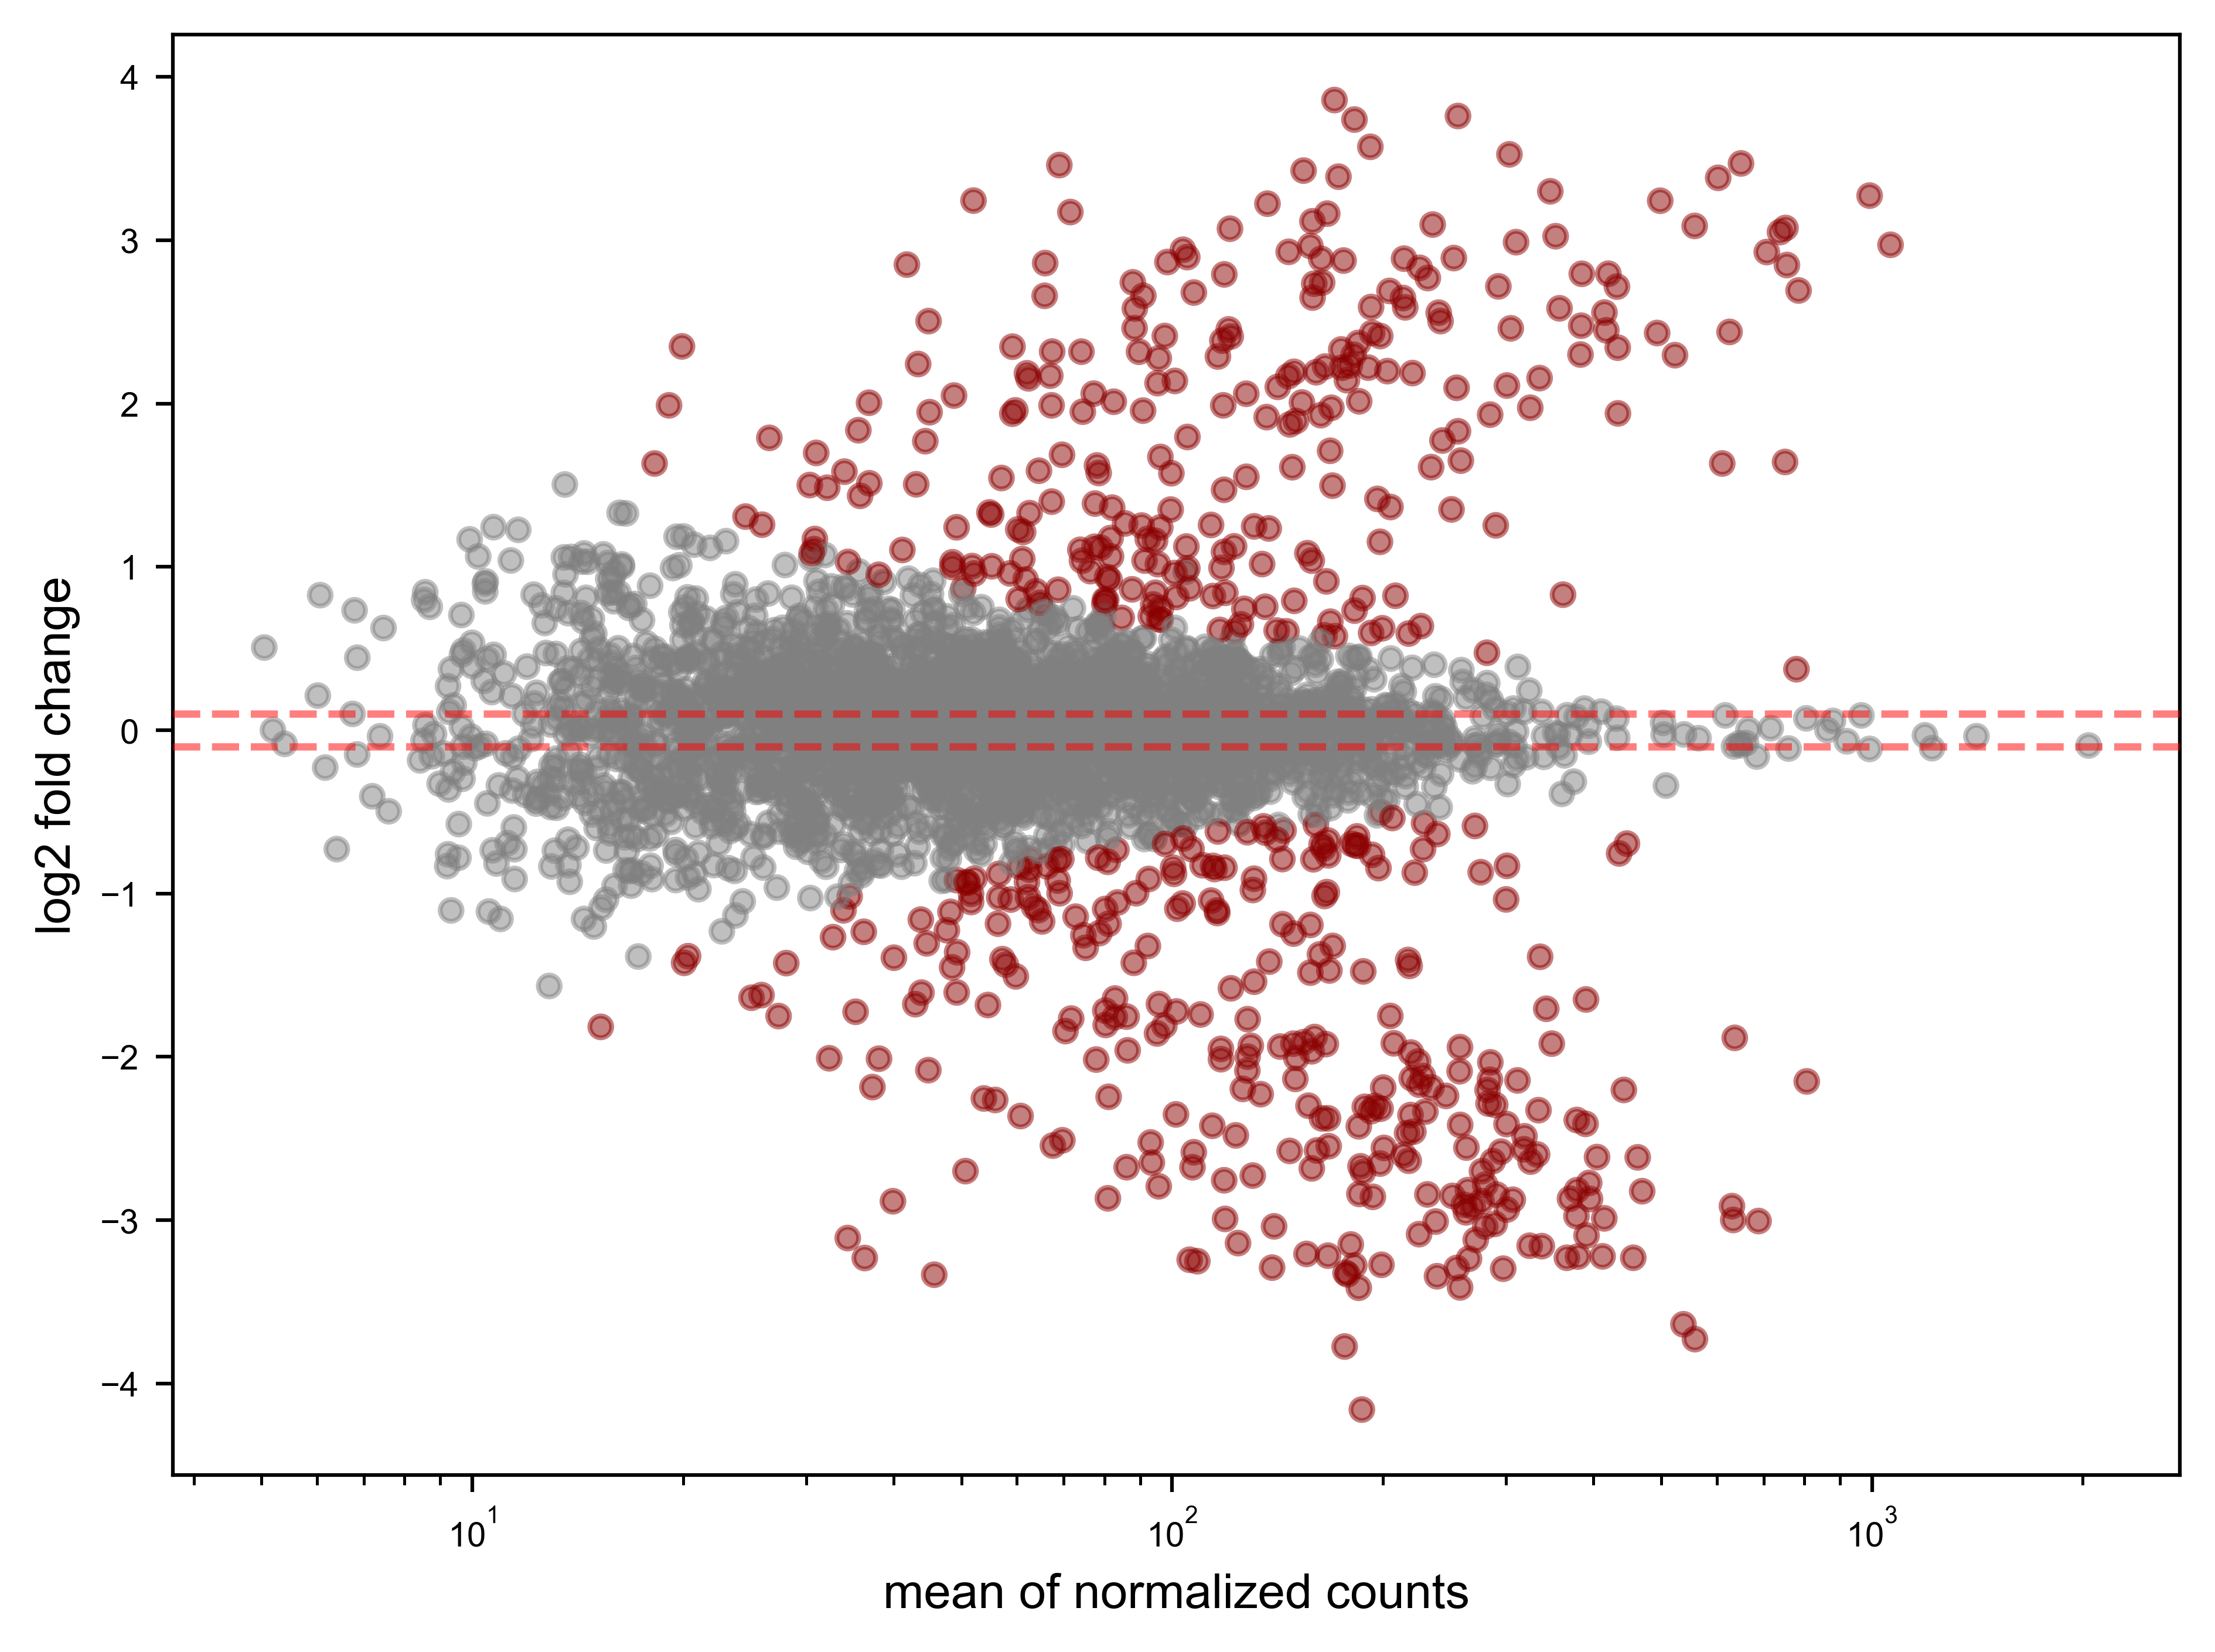

In [6]:
import os

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats


### Data filtering
samples_to_keep = ~metadata.condition.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

# Next, we filter out genes that have less than min_n_reads read counts in total. 
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= min_n_reads]
counts_df = counts_df[genes_to_keep]

# Run DESeq2
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    refit_cooks=False,
    inference=inference,
)
dds.deseq2()

ds = DeseqStats(dds, contrast=contrast, inference=inference)
print(ds.summary())

ds.summary(lfc_null=0.1, alt_hypothesis="greaterAbs")
ds.plot_MA(s=20)


### identify the number of the GLC and YLQ TCRs are not detected in all replicates

In [7]:
missing_genes = [gene for gene_list in colors_dict.values() 
                for gene in gene_list if gene not in ds.results_df.index]
print(f"Missing genes: {missing_genes}")

Missing genes: ['1_5_G16_171_YLQPRTFLL', '1_5_G20_175_YLQPRTFLL', '1_6_E13_144_YLQPRTFLL']


### subset ref_df on the TCRs detected in all replicates and add the deseq2 results

In [8]:
ds_results_df = ds.results_df.copy()
# map on TCR, add all ds_results_df columns to ref_df_subset
ref_df_subset_copy = ref_df_subset.copy()
ref_df_subset_copy = ref_df_subset_copy.merge(ds_results_df, left_on='name', right_index=True, how='left')
# how many missing values in ['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']
print(ref_df_subset_copy[['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']].isna().sum())
# remove rows with missing values
ref_df_subset_copy = ref_df_subset_copy.dropna(subset=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj'])
print(len(ref_df_subset_copy))

# save to csv
# ref_df_subset_copy.to_csv('out/ref_df_ylq_glc_screen_results_deseq2.csv')

baseMean          265
log2FoldChange    265
lfcSE             265
stat              265
pvalue            265
padj              265
dtype: int64
3428


### plot MA with colored by GLC and YLQ vdjdb annotation and pilot data status

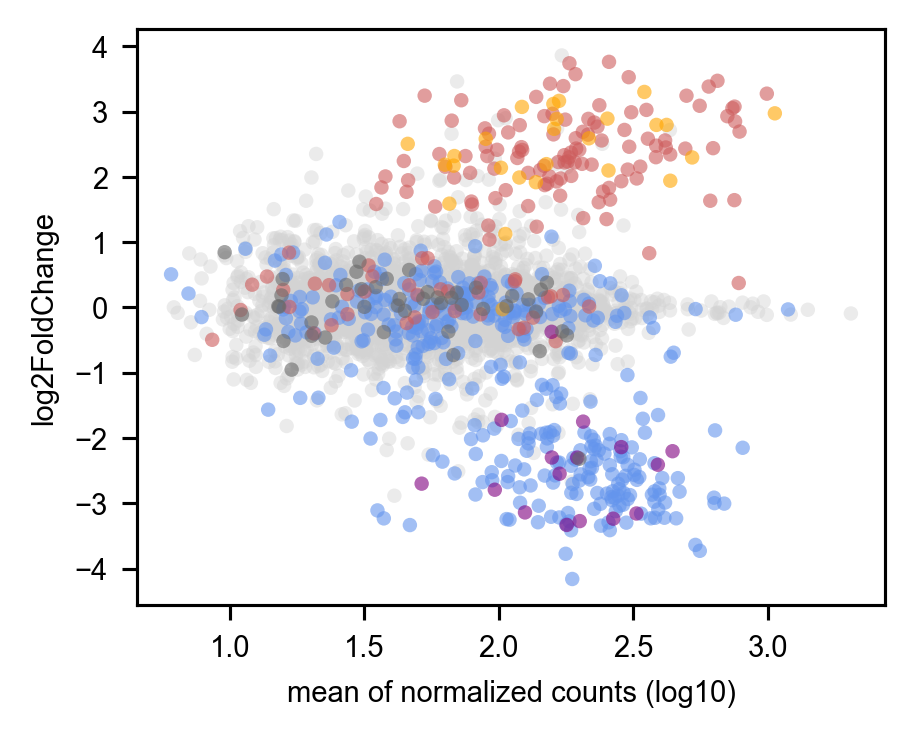

In [10]:
import matplotlib.pyplot as plt
import numpy as np

results_df = ds.results_df.copy()
results_df['baseMean'] = results_df['baseMean'].apply(lambda x: np.log10(x+1))
results_df = color_df_on_color_loop(results_df, colors_dict, color_loop, baseline_coloring=True)

plt.figure(figsize=figsize)

for color in color_loop:
    if color in results_df['color'].unique():
        if color == 'lightgrey':
            alpha = background_alpha
        else:
            alpha = color_alpha
        subset_df = results_df.loc[results_df['color'] == color]
        plt.scatter(subset_df['baseMean'], subset_df['log2FoldChange'], color=color, label=color_name_dict[color], alpha=alpha, s=dotsize, edgecolor='none')
    plt.xlabel('mean of normalized counts (log10)', fontsize=fontsize_axes)
    plt.ylabel('log2FoldChange', fontsize=fontsize_axes)

if SAVE_DROPBOX:
    plt.savefig(out_path_dropbox + 'MA_pilot_and_vdjdb_glc_ylq_with_pilot.pdf', dpi=300, bbox_inches='tight')
else:
    plt.show()
    plt.close()

### plot VDJdb annotation only

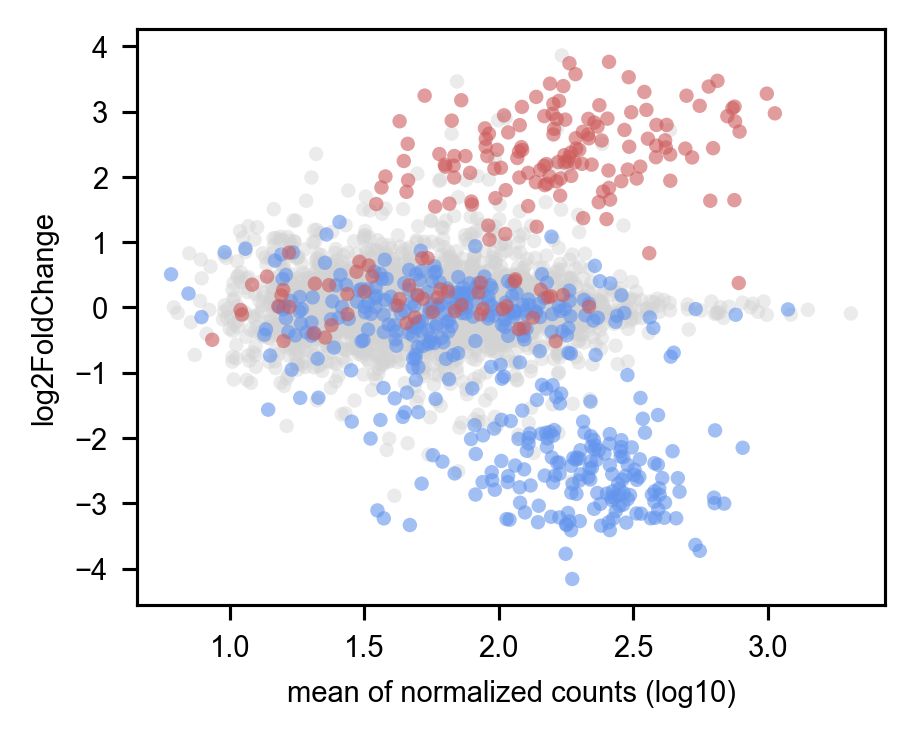

In [11]:
import matplotlib.pyplot as plt
import numpy as np

results_df = ds.results_df.copy()
results_df['baseMean'] = results_df['baseMean'].apply(lambda x: np.log10(x+1))
color_loop_glc_ylq_only = ['lightgrey',
 'cornflowerblue',
 'indianred',]
results_df = color_df_on_color_loop(results_df, colors_dict, color_loop_glc_ylq_only, baseline_coloring=True)

plt.figure(figsize=figsize)

for color in color_loop_glc_ylq_only:
    if color in results_df['color'].unique():
        if color == 'lightgrey':
            alpha = background_alpha
        else:
            alpha = color_alpha
        subset_df = results_df.loc[results_df['color'] == color]
        plt.scatter(subset_df['baseMean'], subset_df['log2FoldChange'], color=color, label=color_name_dict[color], alpha=alpha, s=dotsize, edgecolor='none')
    plt.xlabel('mean of normalized counts (log10)', fontsize=fontsize_axes)
    plt.ylabel('log2FoldChange', fontsize=fontsize_axes)

if SAVE_DROPBOX:
    plt.savefig(out_path_dropbox + 'MA_vdjdb_glc_ylq.pdf', dpi=300, bbox_inches='tight')
else:
    plt.show()
    plt.close()


### plot color for collapsed v gene annotation

TRAV 5
TRBV 41
TRAV other allele: 5
TRBV other allele: 41
TRAV other allele: ['2_15_B22_117_GLCTLVAML', '2_15_C15_122_GLCTLVAML', '2_15_H20_187_GLCTLVAML', '2_16_F8_67_GLCTLVAML', '2_16_H6_89_GLCTLVAML']
TRBV other allele: ['2_15_A19_102_GLCTLVAML', '2_15_A20_103_GLCTLVAML', '2_15_A21_104_GLCTLVAML', '2_15_A23_106_GLCTLVAML', '2_15_B14_109_GLCTLVAML', '2_15_B22_117_GLCTLVAML', '2_15_C14_121_GLCTLVAML', '2_15_C15_122_GLCTLVAML', '2_15_C16_123_GLCTLVAML', '2_15_C21_128_GLCTLVAML', '2_15_D13_132_GLCTLVAML', '2_15_D15_134_GLCTLVAML', '2_15_D16_135_GLCTLVAML', '2_15_D18_137_GLCTLVAML', '2_15_D19_138_GLCTLVAML', '2_15_D20_139_GLCTLVAML', '2_15_D21_140_GLCTLVAML', '2_15_D22_141_GLCTLVAML', '2_15_D24_143_GLCTLVAML', '2_15_E16_147_GLCTLVAML', '2_15_E19_150_GLCTLVAML', '2_15_E20_151_GLCTLVAML', '2_15_E21_152_GLCTLVAML', '2_15_E23_154_GLCTLVAML', '2_15_F15_158_GLCTLVAML', '2_15_F21_164_GLCTLVAML', '2_15_F22_165_GLCTLVAML', '2_15_G18_173_GLCTLVAML', '2_15_H13_180_GLCTLVAML', '2_15_H14_181_GLCTLVAM

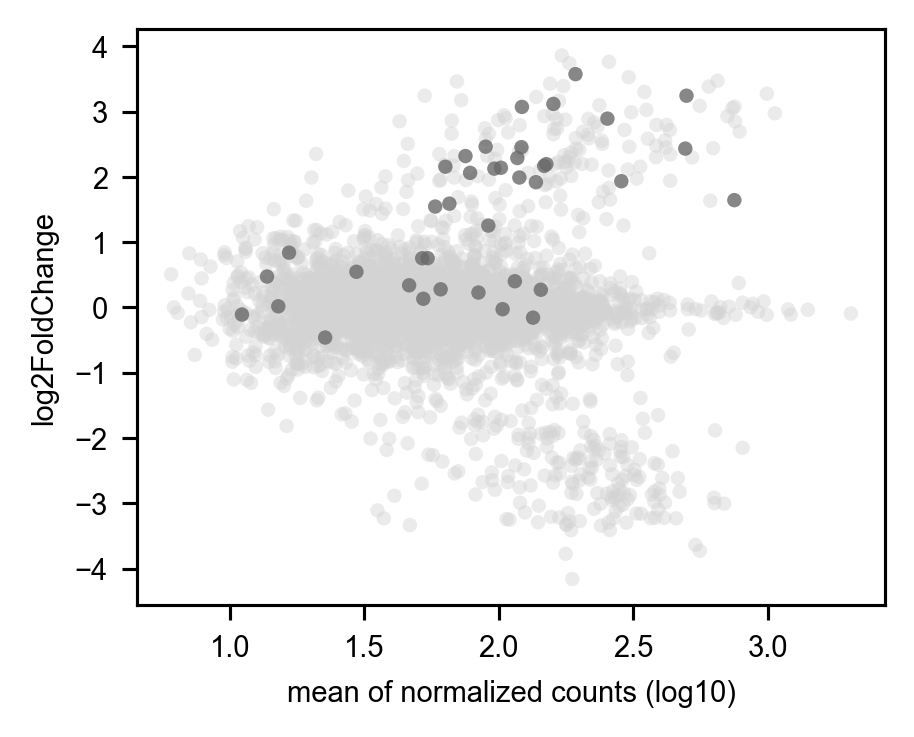

TRAV 0
TRBV 0
TRAV other allele: 0
TRBV other allele: 0
TRAV other allele: []
TRBV other allele: []
color
lightgrey    3428
Name: count, dtype: int64


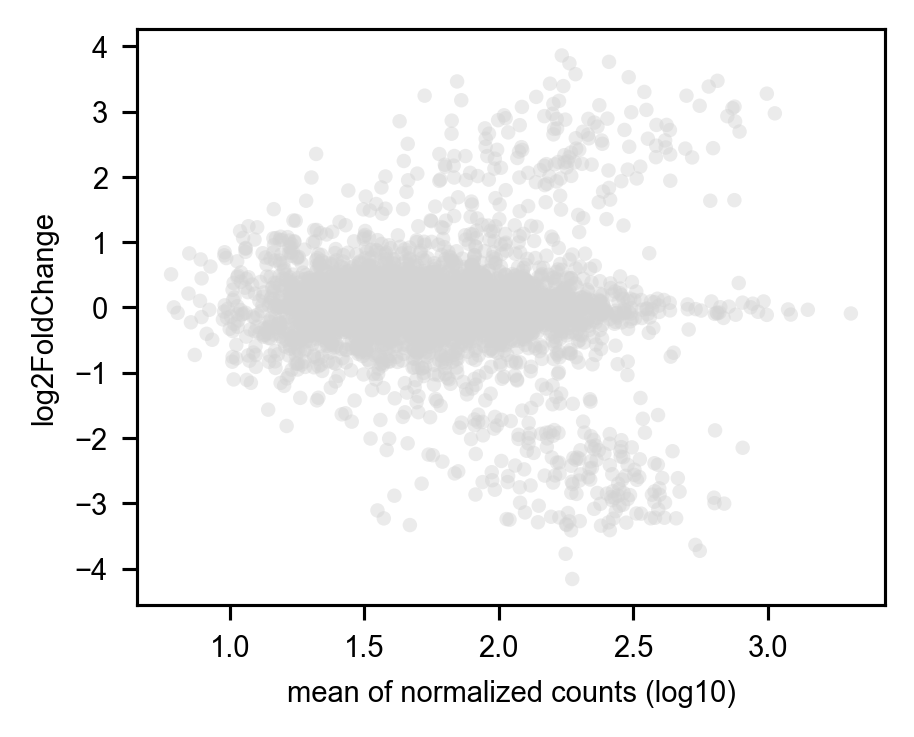

In [12]:
import matplotlib.pyplot as plt
import numpy as np

for glc_or_ylq in ['GLCTLVAML', 'YLQPRTFLL']:

    vdj_genes = ['TRAV', 'TRBV']
    vdj_genes_different = {}
    for vdj in vdj_genes:
        same_vdj = ref_df_subset[vdj + '_IMGT'] == ref_df_subset[vdj +'_IMGT_allele_collapsed']
        names = ref_df_subset[~same_vdj]['name']
        names = names[names.str.contains(glc_or_ylq)]

        vdj_genes_different[vdj] = list(names)
        print(vdj, len(vdj_genes_different[vdj]))

    color_name_dict_vdj = color_name_dict.copy()
    color_name_dict_vdj['dimgrey'] = 'trav_other_allele'
    color_name_dict_vdj['dimgray'] = 'trbv_other_allele'

    print('TRAV other allele:', len(vdj_genes_different['TRAV']))
    print('TRBV other allele:', len(vdj_genes_different['TRBV']))
    print('TRAV other allele:', vdj_genes_different['TRAV'])
    print('TRBV other allele:', vdj_genes_different['TRBV'])
    


    color_loop_vdj = [
        'lightgrey',
        # 'cornflowerblue',
        # 'indianred',
        # 'orange',
        # 'purple',
        'dimgrey',
        'dimgray',
        # 'greenyellow', 
        # 'chartreuse',
        ]
    colors_dict_vdj = colors_dict.copy()
    colors_dict_vdj['dimgrey'] = vdj_genes_different['TRAV']
    colors_dict_vdj['dimgray'] = vdj_genes_different['TRBV']

    results_df = ds.results_df.copy()
    results_df['baseMean'] = results_df['baseMean'].apply(lambda x: np.log10(x+1))
    results_df = color_df_on_color_loop(results_df, colors_dict_vdj, color_loop_vdj, baseline_coloring=False)
    print(results_df['color'].value_counts())

    plt.figure(figsize=figsize)

    for color in color_loop_vdj:
        if color in results_df['color'].unique():
            if color == 'lightgrey':
                alpha = background_alpha
            else:
                alpha = 0.8
            subset_df = results_df.loc[results_df['color'] == color]
            plt.scatter(subset_df['baseMean'], 
                        subset_df['log2FoldChange'], 
                        color=color, 
                        label=color_name_dict_vdj[color], 
                        alpha=alpha, 
                        s=dotsize,
                        edgecolors='none')
            
        plt.xlabel('mean of normalized counts (log10)', fontsize=fontsize_axes)
        plt.ylabel('log2FoldChange', fontsize=fontsize_axes)

    if SAVE_DROPBOX:
        plt.savefig(out_path_dropbox + f'MA_color_vdj_other_allele_{glc_or_ylq}.pdf', dpi=300, bbox_inches='tight')
    else:
        plt.show()
        plt.close()

### pilot data only

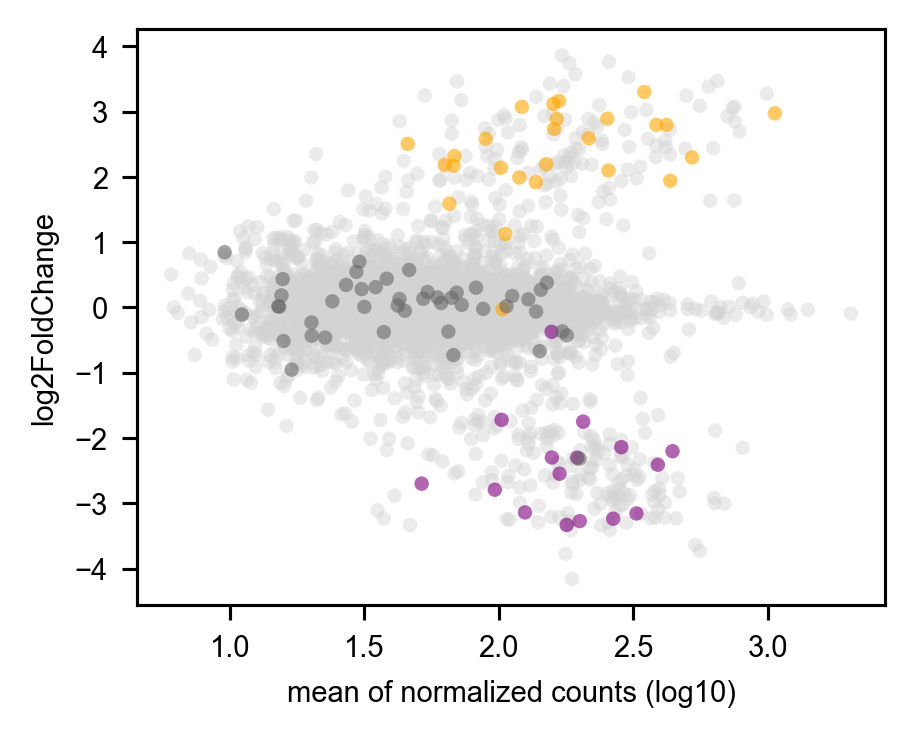

In [13]:
import matplotlib.pyplot as plt
import numpy as np

results_df = ds.results_df.copy()
results_df['baseMean'] = results_df['baseMean'].apply(lambda x: np.log10(x+1))
color_loop_pilot = ['lightgrey', 'cornflowerblue', 'indianred','orange', 'purple','dimgrey', 'dimgray']
results_df = color_df_on_color_loop(results_df, colors_dict, color_loop_pilot, baseline_coloring=False)

plt.figure(figsize=figsize)

for color in color_loop_pilot:
    if color in results_df['color'].unique():
        if color == 'lightgrey':
            alpha = background_alpha
        else:
            alpha = color_alpha
        subset_df = results_df.loc[results_df['color'] == color]
        plt.scatter(subset_df['baseMean'], 
                    subset_df['log2FoldChange'], 
                    color=color, 
                    label=color_name_dict[color], 
                    alpha=alpha, 
                    s=dotsize, 
                    edgecolor='none'
                    )    
plt.xlabel('mean of normalized counts (log10)', fontsize=fontsize_axes)
plt.ylabel('log2FoldChange', fontsize=fontsize_axes)

if SAVE_DROPBOX:
    plt.savefig(out_path_dropbox + 'MA_pilot.pdf', bbox_inches='tight', dpi=300)
else:
    plt.show()
    plt.close()

### plot YLQ and GLC pilot data separately

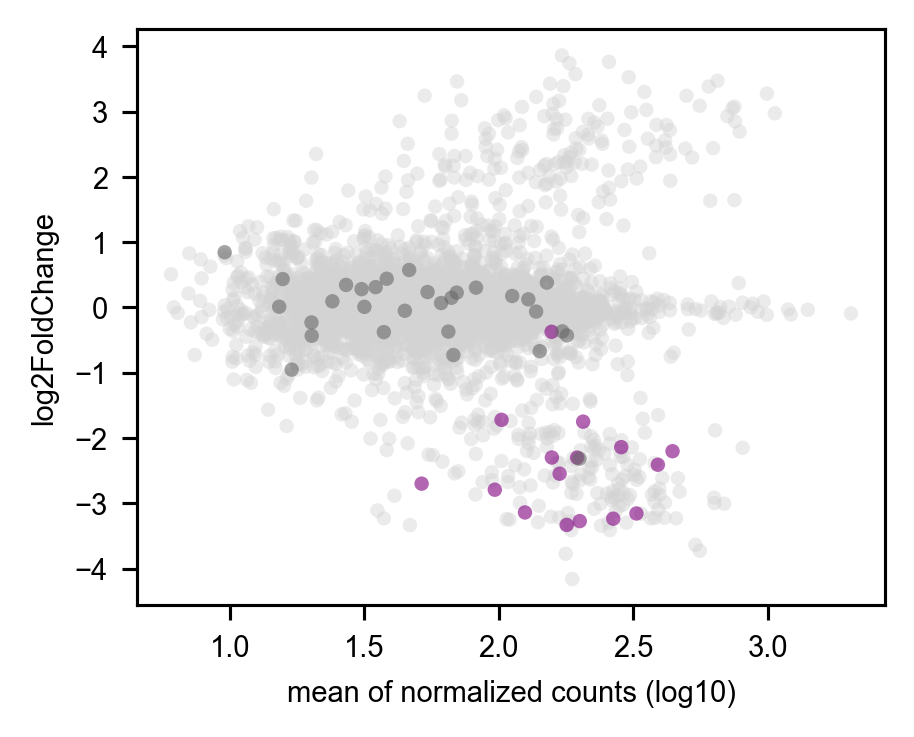

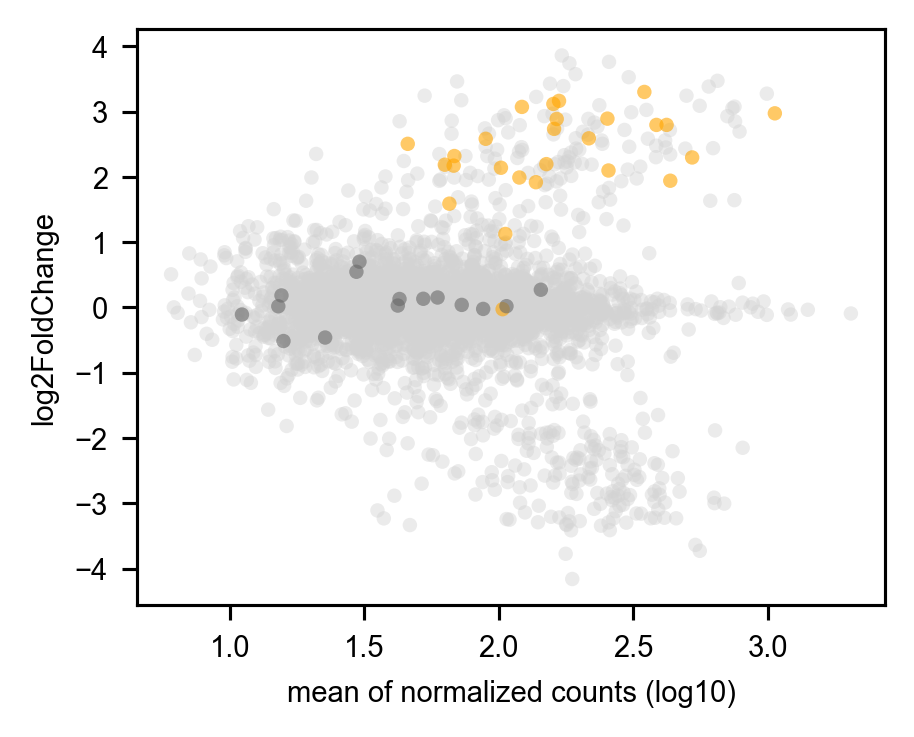

In [14]:
import matplotlib.pyplot as plt
import numpy as np

ylq_glc_only_dict = {
    'ylq': ['purple', 'dimgrey'],
    'glc': ['orange', 'dimgray']
}

for ylq_or_glc_only, colors_ylq_glc in ylq_glc_only_dict.items():
    results_df = ds.results_df.copy()
    results_df['baseMean'] = results_df['baseMean'].apply(lambda x: np.log10(x+1))

    color_loop_pilot_ylq = ['lightgrey'] + colors_ylq_glc
    results_df = color_df_on_color_loop(results_df, colors_dict, color_loop_pilot_ylq, baseline_coloring=False)
    plt.figure(figsize=figsize)

    for color in color_loop_pilot_ylq:
        if color in results_df['color'].unique():
            if color == 'lightgrey':
                alpha = background_alpha
            else:
                alpha = color_alpha
            subset_df = results_df.loc[results_df['color'] == color]
            plt.scatter(subset_df['baseMean'], 
                        subset_df['log2FoldChange'], 
                        color=color, 
                        label=color_name_dict[color], 
                        alpha=alpha, 
                        s=dotsize, 
                        edgecolor='none'
                        )    
    plt.xlabel('mean of normalized counts (log10)', fontsize=fontsize_axes)
    plt.ylabel('log2FoldChange', fontsize=fontsize_axes)

    if SAVE_DROPBOX:
        plt.savefig(out_path_dropbox + f'MA_pilot_{ylq_or_glc_only}_only.pdf', bbox_inches='tight', dpi=300)
    else:
        plt.show()
        plt.close()

### color for differend padj thresholds

Threshold: 0.05


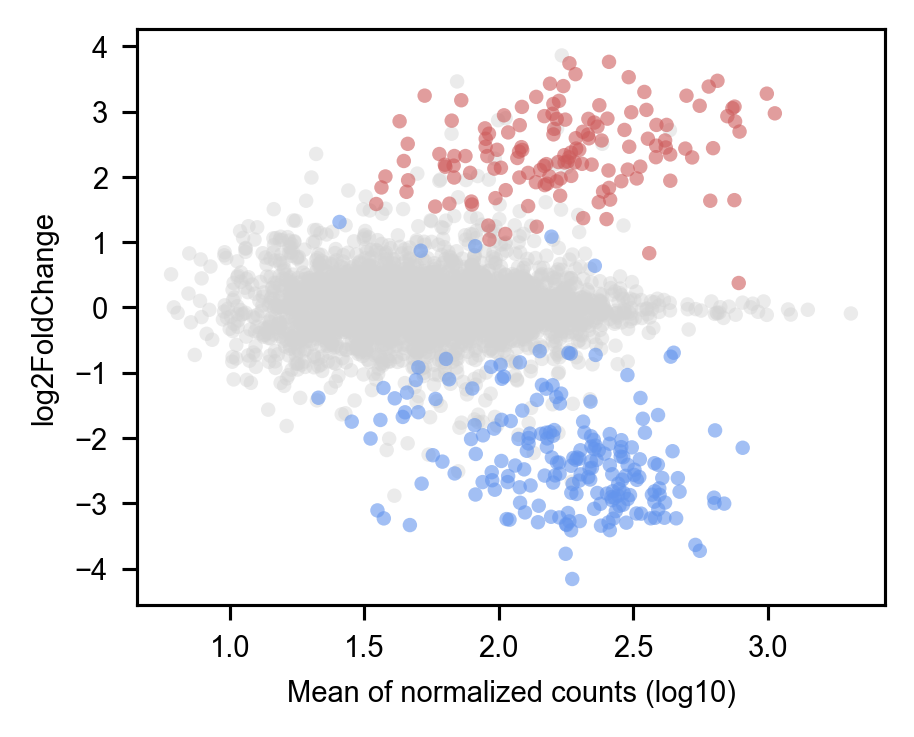

Threshold: 0.01


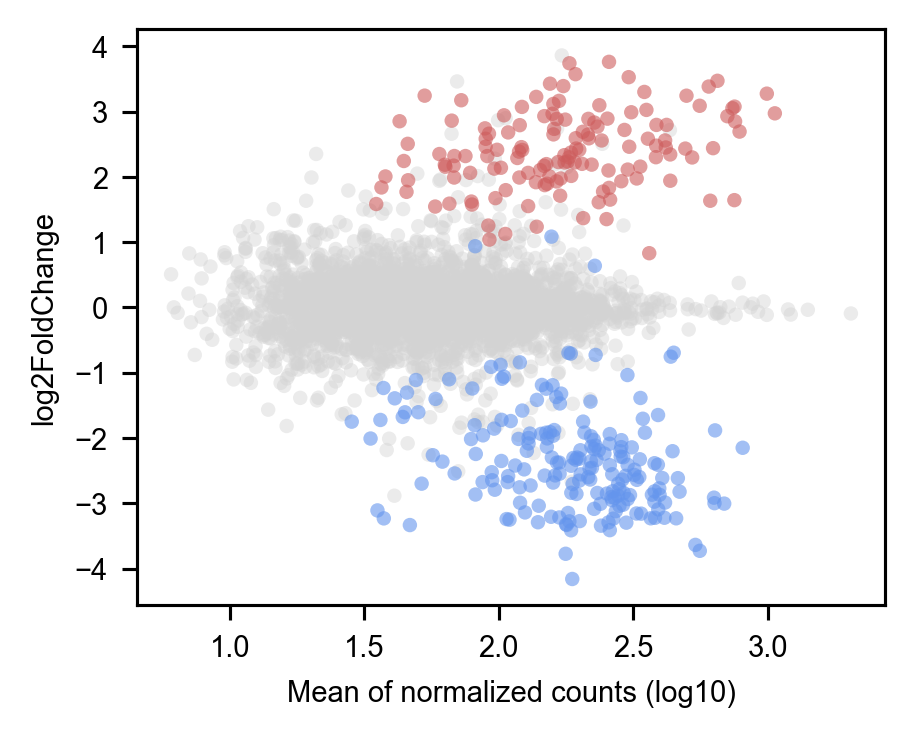

Threshold: 0.001


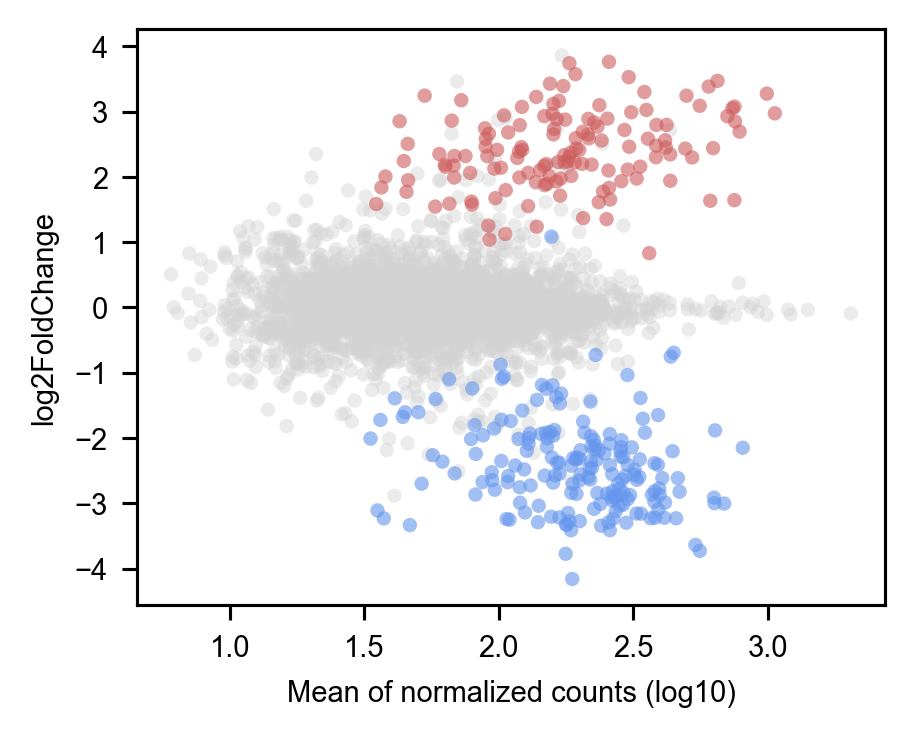

Threshold: 1e-05


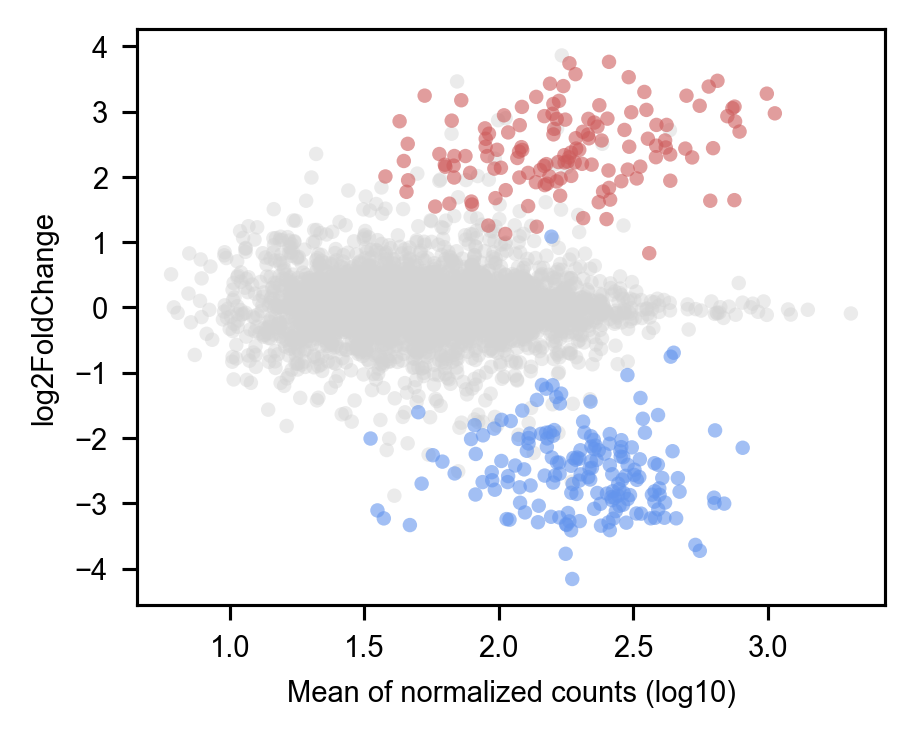

Threshold: 1e-07


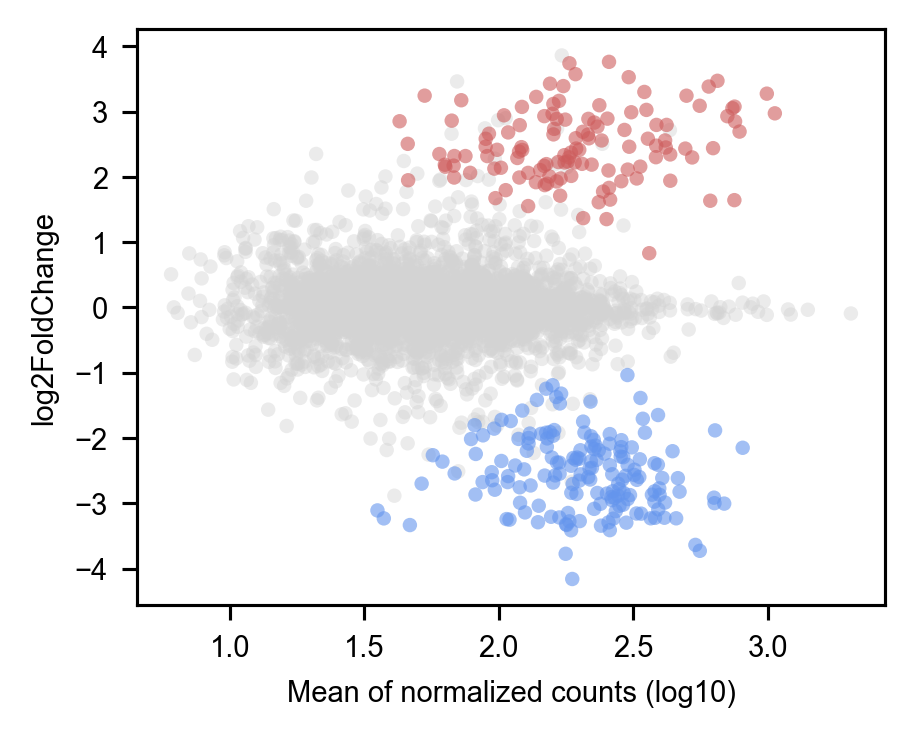

Threshold: 1e-09


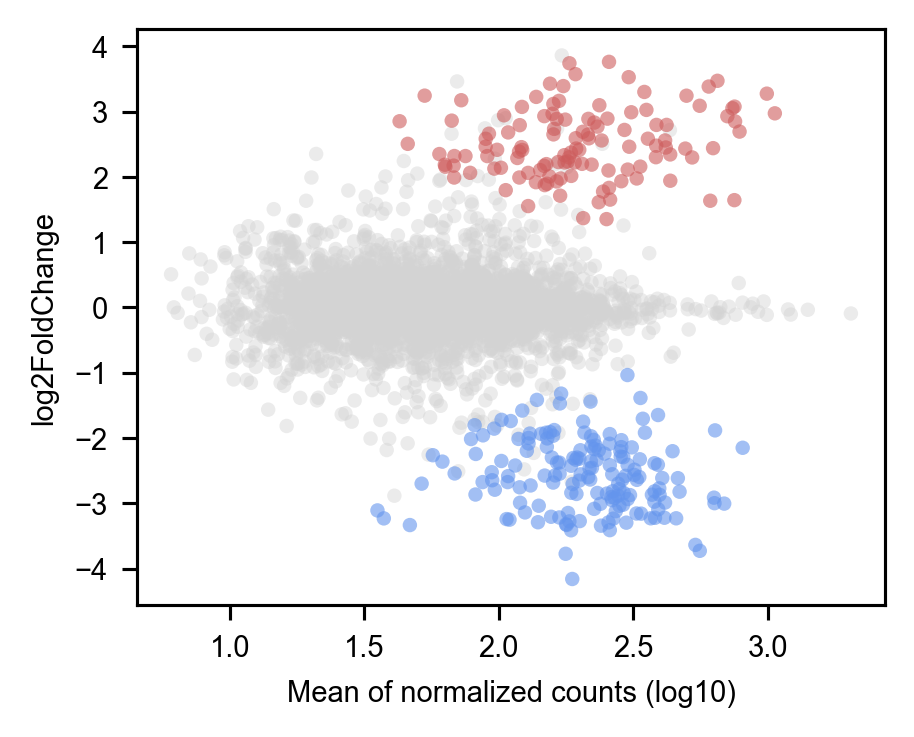

In [15]:
import matplotlib.pyplot as plt
import numpy as np

padj_thresholds = [0.05, 0.01, 0.001, 0.00001, 0.0000001, 0.000000001]

for threshold in padj_thresholds:
    print(f"Threshold: {threshold}")
    def get_significance_binary_color(padj, threshold, color):
        if padj < threshold:
            return color
        return 'lightgrey'
    
    results_df = ds.results_df.copy()
    results_df['baseMean'] = results_df['baseMean'].apply(lambda x: np.log10(x + 1))
    results_df['color'] = 'lightgrey'
    
    for index, row in results_df.iterrows():
        if 'GLCTLVAML' in index:
            results_df.loc[index, 'color'] = get_significance_binary_color(row['padj'], threshold, 'indianred')
        elif 'YLQPRTFLL' in index:
            results_df.loc[index, 'color'] = get_significance_binary_color(row['padj'], threshold, 'cornflowerblue')


    plt.figure(figsize=(figsize[0], figsize[1]))
    for color in results_df['color'].unique():
        if color == 'lightgrey':
            alpha = background_alpha
        else:
            alpha = color_alpha
        subset_df = results_df.loc[results_df['color'] == color]
        plt.scatter(subset_df['baseMean'], subset_df['log2FoldChange'], color=color, alpha=alpha, s=dotsize, edgecolor='none')

    plt.xlabel('Mean of normalized counts (log10)', fontsize=fontsize_axes)
    plt.ylabel('log2FoldChange', fontsize=fontsize_axes)
    if SAVE_DROPBOX:
        plt.savefig(out_path_dropbox + f'MA_ylq_glc_significance_binary_{threshold}.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

### same but smaller

Threshold: 1e-05


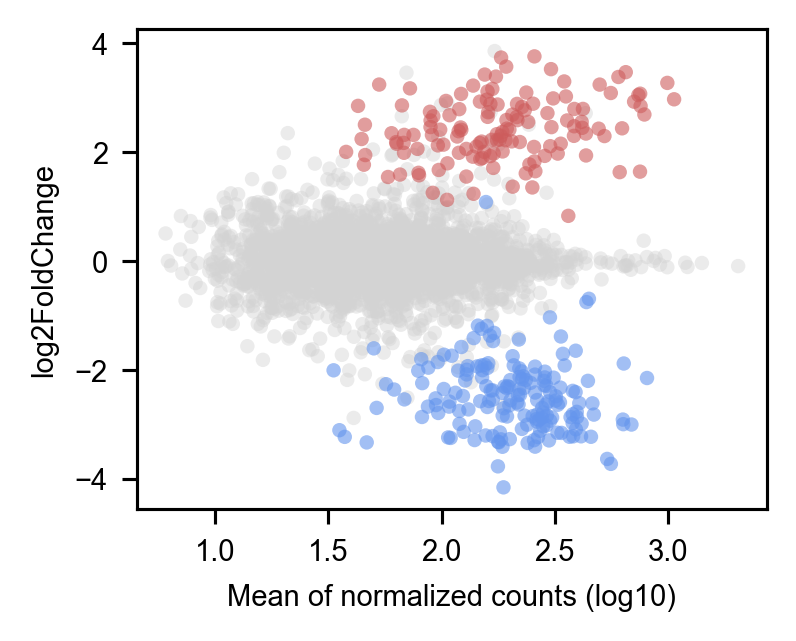

Threshold: 1000


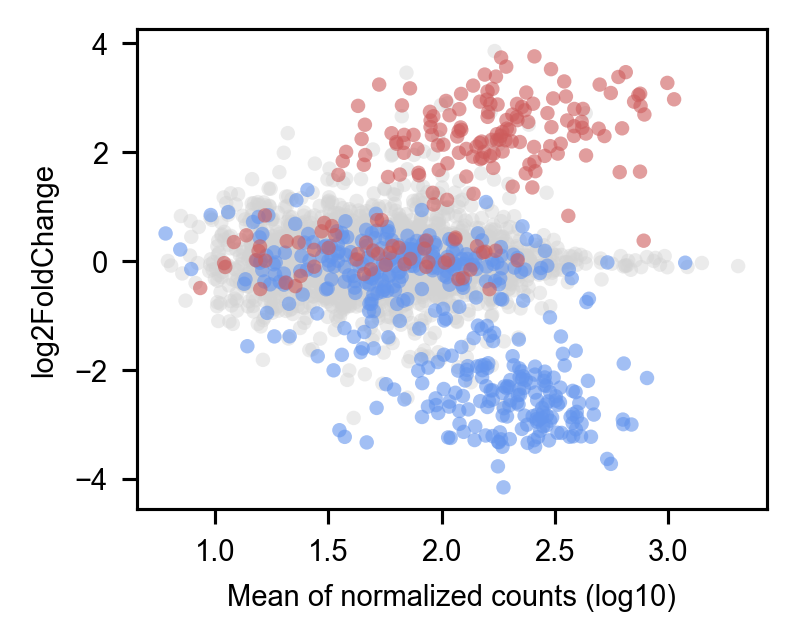

In [16]:
import matplotlib.pyplot as plt
import numpy as np

padj_thresholds = [1e-05, 1000]
figsize_smaller = (7/2.54, (6.5/8*7)/2.54)
for threshold in padj_thresholds:
    print(f"Threshold: {threshold}")
    def get_significance_binary_color(padj, threshold, color):
        if padj < threshold:
            return color
        return 'lightgrey'
    
    # Copy results
    results_df = ds.results_df.copy()
    results_df['baseMean'] = results_df['baseMean'].apply(lambda x: np.log10(x + 1))
    
    results_df['color'] = 'lightgrey'
    for index, row in results_df.iterrows():       
        if 'YLQPRTFLL' in index:
            results_df.loc[index, 'color'] = get_significance_binary_color(row['padj'], threshold, 'cornflowerblue')
        elif 'GLCTLVAML' in index:
            results_df.loc[index, 'color'] = get_significance_binary_color(row['padj'], threshold, 'indianred')

    plt.figure(figsize=(figsize_smaller[0], figsize_smaller[1]))

    color_loop = ['lightgrey', 'cornflowerblue', 'indianred']
    for color in color_loop:
        if color == 'lightgrey':
            alpha = background_alpha
        else:
            alpha = color_alpha
        subset_df = results_df.loc[results_df['color'] == color]
        plt.scatter(subset_df['baseMean'], subset_df['log2FoldChange'], color=color, alpha=alpha, s=dotsize, edgecolor='none')

    plt.xlabel('Mean of normalized counts (log10)', fontsize=fontsize_axes)
    plt.ylabel('log2FoldChange', fontsize=fontsize_axes)
    if SAVE_DROPBOX:
        plt.savefig(out_path_dropbox + f'MA_ylq_glc_significance_binary_{threshold}_smaller.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

### write the hits of GLC and YLQ for different p value thresholds

In [ ]:
for thresh in padj_thresholds:
    # get logfold positive, GLC, padj <  1e-07
    glc_hits_p = ds.results_df[(ds.results_df['log2FoldChange'] > 0) & (ds.results_df['padj'] < thresh)].copy().index
    glc_hits_p = [hit for hit in glc_hits_p if 'GLCTLVAML' in hit]
    print(len(glc_hits_p))

    # with open(f'glc_hits_p{str(thresh)}', 'w') as f:
    #     for item in glc_hits_p:
    #         f.write("%s\n" % item)

print()
for thresh in padj_thresholds:
    # get logfold positive, YLQ, padj <  1e-07
    ylq_hits_p = ds.results_df[(ds.results_df['log2FoldChange'] < 0) & (ds.results_df['padj'] < thresh)].copy().index
    ylq_hits_p = [hit for hit in ylq_hits_p if 'YLQPRTFLL' in hit]
    print(len(ylq_hits_p))

    # with open(f'ylq_hits_p{str(thresh)}', 'w') as f:e
    #     for item in ylq_hits_p:
    #         f.write("%s\n" % item)


134
174

171
311
